<a href="https://colab.research.google.com/github/VaaRsty/Diamond-Price-Prediction-DNN/blob/main/Tugas_Akhir_DL(2318016).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1: Menghubungkan ke Google Drive**
Jalankan cell ini dan berikan izin akses ke Drive kamu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2: Import Library Utama**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model

print("Library berhasil di-import!")

Library berhasil di-import!


# **3: Memuat Dataset dari Drive**
Pastikan file dataset diamonds.csv sudah ada di Drive Colab Notebook kamu. Sesuaikan path jika folder kamu berbeda.

In [ ]:
# Ganti path sesuai lokasi file Anda
path = '/content/drive/MyDrive/Colab Notebooks/diamonds.csv'
df = pd.read_csv(path)

# Hapus kolom index tambahan jika ada
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("Dataset berhasil dimuat!")
df.head()

Dataset berhasil dimuat!


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# **4: Preprocessing**
Saya menggunakan dua scaler berbeda agar harga bisa dikembalikan ke Dollar asli nanti.

In [ ]:
# 1. Encoding data teks menjadi angka
le = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    df[col] = le.fit_transform(df[col])

# 2. Pisahkan Fitur (X) dan Target Harga (y)
X = df.drop('price', axis=1)
y = df['price'].values.reshape(-1, 1)

# 3. Scaling (Penting untuk stabilitas DNN)
scaler_X = StandardScaler()
scaler_y = StandardScaler() # Khusus untuk target harga

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 4. Split data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# **5: Membuat Arsitektur Model**
Menyisipkan Batch Normalization di setiap lapisan.

In [ ]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(), # Penstabil data

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Pencegah overfitting

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1) # Output: Prediksi Harga
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 448 (1.75 KB)

# **6: Visualisasi Node-Link Diagram**
Visualisasi ini menunjukkan hubungan antar saraf secara detail.

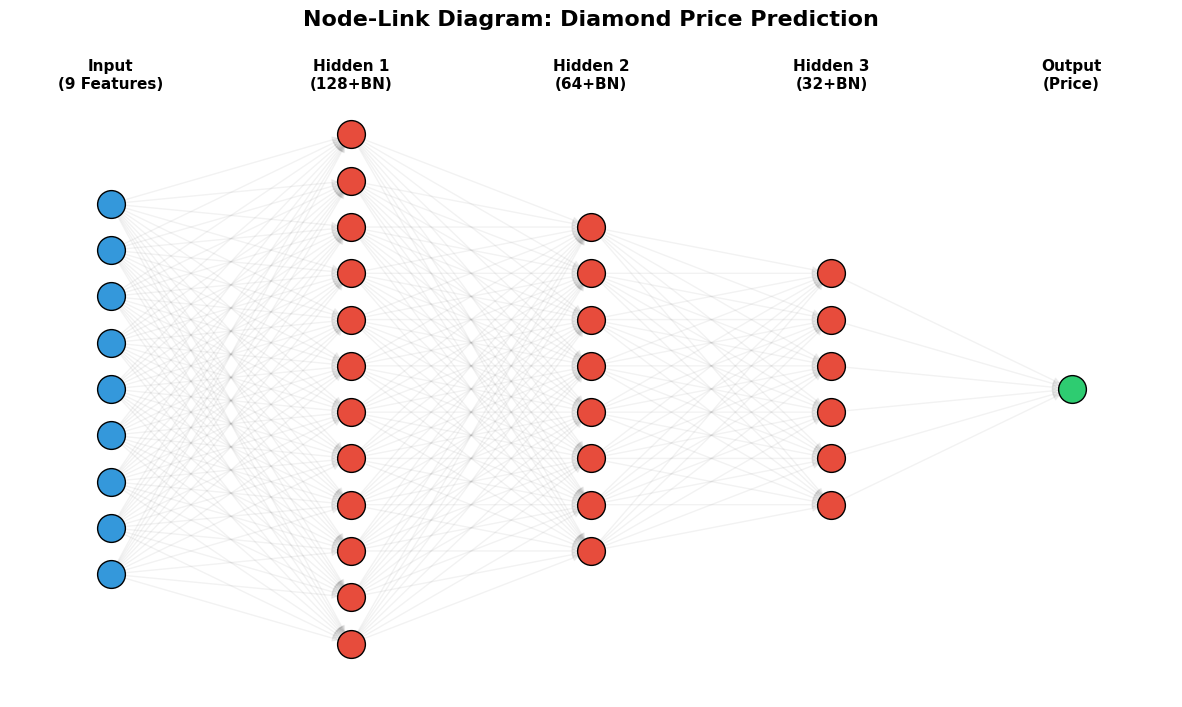

In [ ]:
import networkx as nx
def draw_detailed_ann():
    layers_nodes = [9, 12, 8, 6, 1] # Representasi node per layer
    layer_names = ['Input\n(9 Features)', 'Hidden 1\n(128+BN)', 'Hidden 2\n(64+BN)', 'Hidden 3\n(32+BN)', 'Output\n(Price)']

    G = nx.DiGraph()
    pos = {}

    for i, num_nodes in enumerate(layers_nodes):
        for j in range(num_nodes):
            node_id = f"{i}_{j}"
            G.add_node(node_id)
            pos[node_id] = (i * 2, -j + num_nodes/2)

    for i in range(len(layers_nodes) - 1):
        for j in range(layers_nodes[i]):
            for k in range(layers_nodes[i+1]):
                G.add_edge(f"{i}_{j}", f"{i+1}_{k}")

    plt.figure(figsize=(15, 8))
    plt.title("Node-Link Diagram: Diamond Price Prediction", fontsize=16, fontweight='bold', pad=40)

    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    colors = ['#3498db', '#e74c3c', '#e74c3c', '#e74c3c', '#2ecc71']

    for i, num_nodes in enumerate(layers_nodes):
        nodes_in_layer = [f"{i}_{j}" for j in range(num_nodes)]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_layer, node_color=colors[i], node_size=400, edgecolors='black')
        plt.text(i * 2, max(layers_nodes)/2 + 1, layer_names[i], horizontalalignment='center', fontsize=11, fontweight='bold')

    plt.axis('off')
    plt.show()

draw_detailed_ann()

# **7: Training Model**

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4662 - mae: 0.4731 - val_loss: 0.0710 - val_mae: 0.1645
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1407 - mae: 0.2566 - val_loss: 0.0658 - val_mae: 0.1486
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1274 - mae: 0.2399 - val_loss: 0.0671 - val_mae: 0.1597
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1126 - mae: 0.2266 - val_loss: 0.0518 - val_mae: 0.1310
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1025 - mae: 0.2180 - val_loss: 0.0607 - val_mae: 0.1671
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0961 - mae: 0.2140 - val_loss: 0.0535 - val_mae: 0.1397
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0887 - mae: 0.2108 - val_loss: 0.0362 - val_mae: 0.1080
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0817 - mae: 0.2049 - val_loss: 0.0361 - val_mae: 0.1041
Epoch 9/50
1079/1079 ━━━━━━━━━━━━━━━━━━━

# **8: Tabel Hasil Prediksi**
Konversi Prediksi ke Satuan Dollar (Inverse Scaling)

In [ ]:
# 1. Prediksi data uji
y_pred_scaled = model.predict(X_test)

# 2. Kembalikan ke nilai asli (Inverse Transform)
y_test_asli = scaler_y.inverse_transform(y_test)
y_pred_asli = scaler_y.inverse_transform(y_pred_scaled)

# 3. Tampilkan Tabel
hasil_akhir = pd.DataFrame({
    'Harga Asli ($)': y_test_asli.flatten().astype(int),
    'Prediksi AI ($)': y_pred_asli.flatten().astype(int)
})
hasil_akhir['Selisih ($)'] = abs(hasil_akhir['Harga Asli ($)'] - hasil_akhir['Prediksi AI ($)'])

print("Perbandingan Harga:")
print(hasil_akhir.head(15))

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Perbandingan Harga:
    Harga Asli ($)  Prediksi AI ($)  Selisih ($)
0              559              717          158
1             2201             2409          208
2             1238             1326           88
3             1304             1642          338
4             6901             9034         2133
5             3011             3898          887
6             1765             1733           32
7             1679             1864          185
8             2102             2212          110
9             4789             6080         1291
10             855              852            3
11           13134            11361         1773
12            1367             1712          345
13            2401             2473           72
14            1440             1678          238


# **9: Visualisasi Validasi Model: Scatter Plot Harga Aktual vs. Prediksi**
Grafik ini digunakan untuk memvalidasi performa model secara visual. Garis merah diagonal mewakili kondisi ideal di mana prediksi sama persis dengan harga asli. Semakin rapat titik-titik (data) di sekitar garis merah, semakin tinggi tingkat akurasi dan korelasi model dalam memprediksi harga berlian.

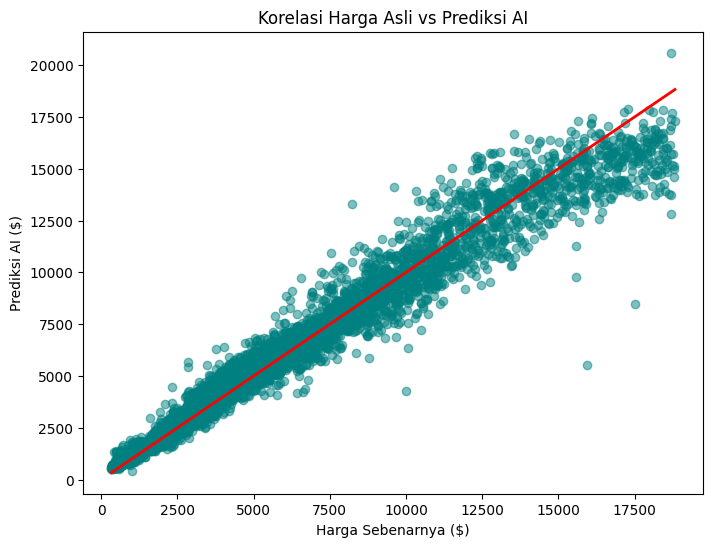

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(hasil_akhir['Harga Asli ($)'], hasil_akhir['Prediksi AI ($)'], alpha=0.5, color='teal')
plt.plot([hasil_akhir['Harga Asli ($)'].min(), hasil_akhir['Harga Asli ($)'].max()],
         [hasil_akhir['Harga Asli ($)'].min(), hasil_akhir['Harga Asli ($)'].max()],
         color='red', lw=2)
plt.xlabel('Harga Sebenarnya ($)')
plt.ylabel('Prediksi AI ($)')
plt.title('Korelasi Harga Asli vs Prediksi AI')
plt.show()

# **10: Grafik Evaluasi (Loss & MAE)**
Grafik ini menunjukkan histori proses pembelajaran model selama 50 epoch. Grafik Loss (MSE) mengukur seberapa besar kesalahan kuadrat model, sementara MAE menunjukkan rata-rata selisih harga dalam skala absolut. Tren penurunan pada kurva Training dan Validation yang saling berdekatan mengindikasikan bahwa model belajar secara optimal tanpa gejala overfitting yang signifikan

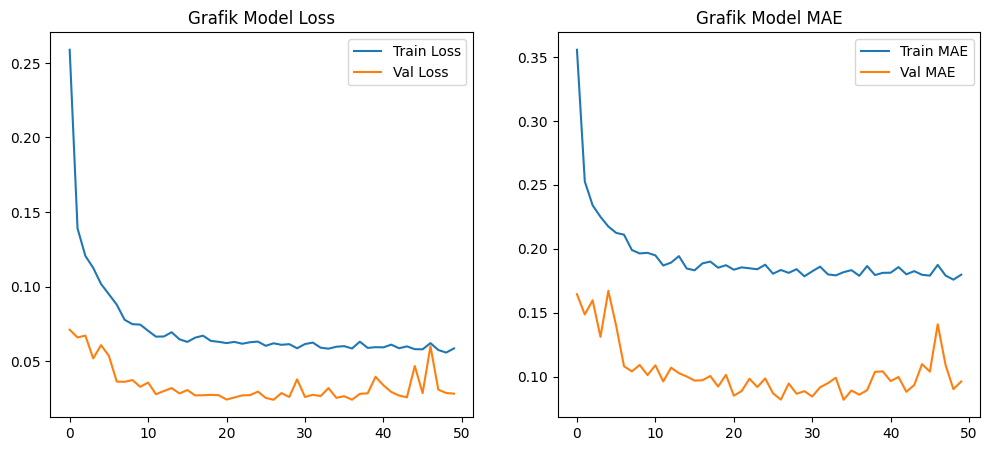

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Grafik Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Grafik Model MAE')
plt.legend()
plt.show()